In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from copy import deepcopy

from alea import BlueiceExtendedModel, Runner
import inference_interface as ii
import scipy.stats as sps






In [2]:

livetime = 14
true_corm = 1.

runner = Runner(
    statistical_model = "alea.BlueiceExtendedModel",
    statistical_model_config="xlzd_model_unconstrained_nu.yaml", 
    hypotheses = ["free","zero"],
    poi = "CEvNS_other_rate_multiplier",
    nominal_values = {"livetime":livetime},
    generate_values = {"CEvNS_other_rate_multiplier":true_corm},
    compute_confidence_interval = True,
    output_filename = "toymc_xlzd_cevns_other_rate_multiploier{:.2f}_{:.1f}ty.ii.hf".format(true_corm, livetime),
    toydata_mode = "generate",
    n_mc = 10,
)



RuntimeError: Can not find xlzd_model_unconstrained_nu.yaml, please check your file system

In [80]:
runner.run()

100%|██████████| 100/100 [00:10<00:00,  9.17it/s]


Saving toymc_xlzd_cevns_other_rate_multiploier1.00_14.0ty.ii.hf
Used real time 11.12s, CPU time 10.92s
Alea iacta est.


In [81]:
ii.toydata_to_file?

Signature:
ii.toydata_to_file(
    file_name,
    datasets_array,
    dataset_names,
    overwrite_existing_file=True,
    metadata={'version': '0.0', 'date': '20241106_11:09:10'},
)
Docstring:
Function to store toy data (in the form of numpy structured arrays) in a hdf5 file
:param datasets_array: list of list of datasets.
(So each element is a list of datasets-- calibration, science, ancillary)
:param dataset_names: list of the names of each dataset
(so e.g. data_sci, data_cal, data_anc) toyMC true generator parameters
may also be stored this way.
If overwrite_existing_file is true, a new file is created overwriting the old,
otherwise, the file is created if absent and appended to otherwise.
File:      ~/.conda/envs/flamedisx_xlzd/lib/python3.11/site-packages/inference_interface.py
Type:      function

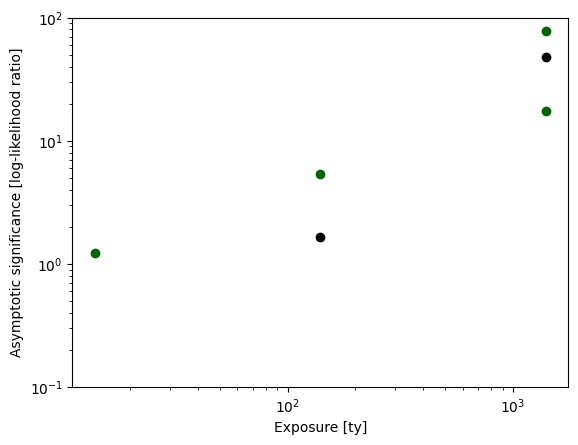

In [5]:
plt.clf()
for exposure in [14,140,1400]:
    res_null = ii.toyfiles_to_numpy("toymc_xlzd_cevns_other_rate_multiploier0.00_{:.1f}ty.ii.hf".format(exposure))
    res_nominal = ii.toyfiles_to_numpy("toymc_xlzd_cevns_other_rate_multiploier1.00_{:.1f}ty.ii.hf".format(exposure))
    llr_disc_null = res_null["free"]["ll"]- res_null["zero"]["ll"]
    llr_disc_nominal = res_nominal["free"]["ll"]- res_nominal["zero"]["ll"]
    
    plt.scatter([exposure], np.percentile(llr_disc_nominal, 50), color="k")
    plt.scatter([exposure], np.percentile(llr_disc_nominal, 15), color="darkgreen")
    plt.scatter([exposure], np.percentile(llr_disc_nominal, 85), color="darkgreen")

plt.xscale("log")
plt.yscale("log")
plt.ylim(0.1,100)
plt.xlabel("Exposure [ty]")
plt.ylabel("Asymptotic significance [log-likelihood ratio]")
plt.show()
    

In [77]:
llr_disc_null = res_null["free"]["ll"]- res_null["zero"]["ll"]
llr_disc_nominal = res_nominal["free"]["ll"]- res_nominal["zero"]["ll"]

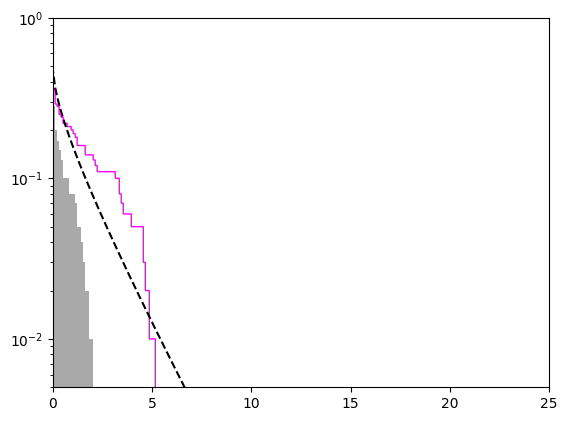

In [78]:
plt.clf()
bins = np.linspace(-1,100,1001)
plt.hist(llr_disc_null, bins=bins, cumulative=-1, density=True, color="darkgray")
plt.hist(llr_disc_nominal, bins=bins, cumulative=-1, density=True, color="magenta", histtype="step")
plt.plot(bins, 0.5*sps.chi2(1).sf(bins), linestyle="--",color="k")
plt.yscale("log")
plt.ylim(0.5/len(llr_disc_null), 1.)
plt.xlim(0,25)
plt.show()


